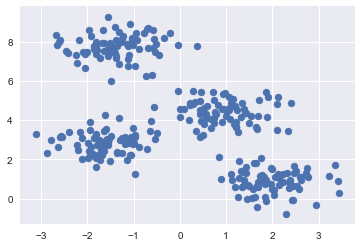

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                 random_state=0, cluster_std=0.60)
plt.scatter(X[:,0], X[:, 1], s=50);

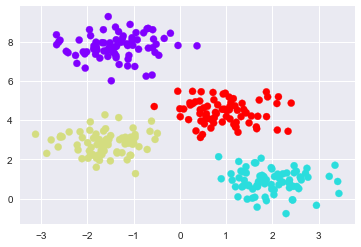

In [2]:
from sklearn.cluster import KMeans
est = KMeans(4)
est.fit(X)
y_means = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_means, s=50, cmap='rainbow')

In [4]:
## Application of KMeans to Digits
from sklearn.datasets import load_digits
digits = load_digits()

est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

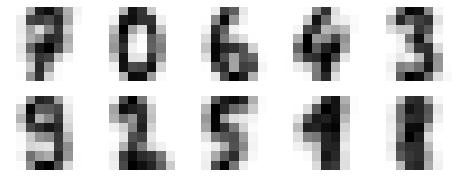

In [5]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape(8,8), cmap=plt.cm.binary)

Text(0.5,1,'true labels')

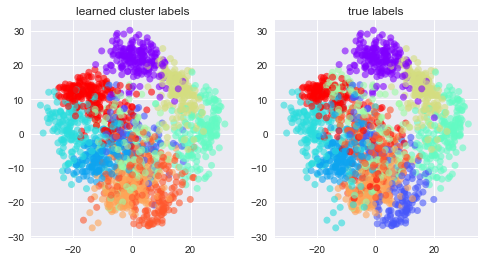

In [6]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
             edgecolor='none', alpha = 0.6)
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X[:,0], X[:,1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')
ax[1].scatter(X[:,0],X[:,1], c=digits.target, **kwargs)
ax[1].set_title('true labels')

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7907623817473567

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 155   0   2   0   7   7  12]
 [  0   5   0   0 164   0   0   9   3   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   5   0 170   2   0]
 [  0   6   3   2   0   6   2   3 100  52]
 [  0  20   0   6   0   7   0   7   1 139]]


Text(0.5,0,'predicted')

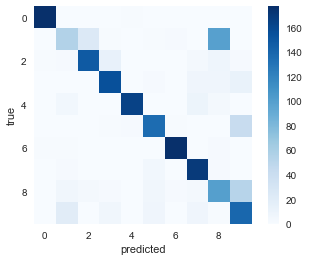

In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

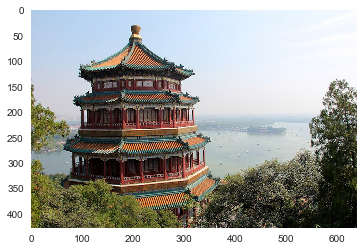

In [14]:
## Example: KMeans for Color Compression
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False)

In [15]:
china.shape

(427, 640, 3)

In [18]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


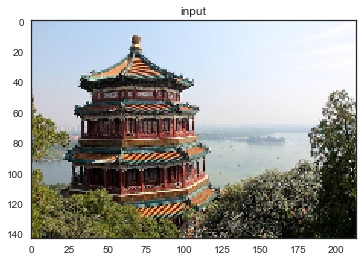

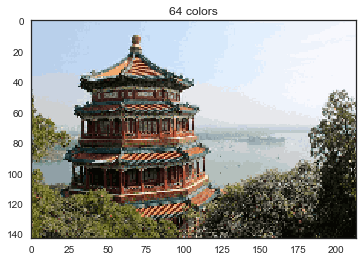

In [22]:
# reduce the size of the image for speed
image = china[::3, ::3]
n_colors = 64

X = (image / 255.0).reshape(-1, 3)
    
model = KMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))